In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pqcd

from scipy.constants import hbar, c, e
from cmcrameri import cm
from pqcd.utils import nsat

from plot_utils import rcparams
plt.rcParams.update(rcparams)

In [2]:
X = 1
pQCDX = pqcd.pQCD(X)

In [3]:
mu = np.linspace(2.4, 100, num=50)

n = []
p = []
epsilon = []
cs2 = []

for muH in mu:
    nH, pH, cs2H = pQCDX.nH(muH), pQCDX.pH(muH), pQCDX.cs2H(muH)
    n.append(nH)
    p.append(pH)
    cs2.append(cs2H)
    epsilon.append(pqcd.epsilon_func(muH, nH, pH))

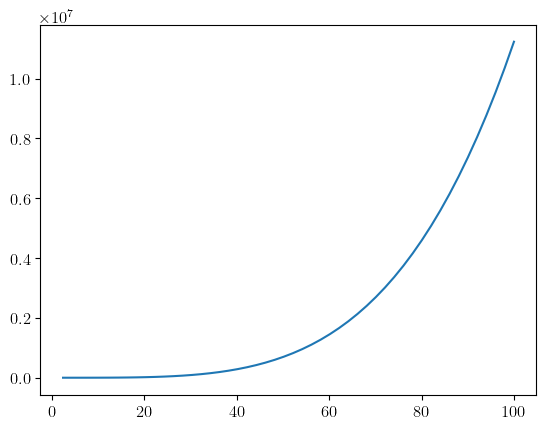

In [4]:
fig, ax = plt.subplots()
ax.plot(mu, p);

In [5]:
cs2_grad = np.gradient(p, epsilon)

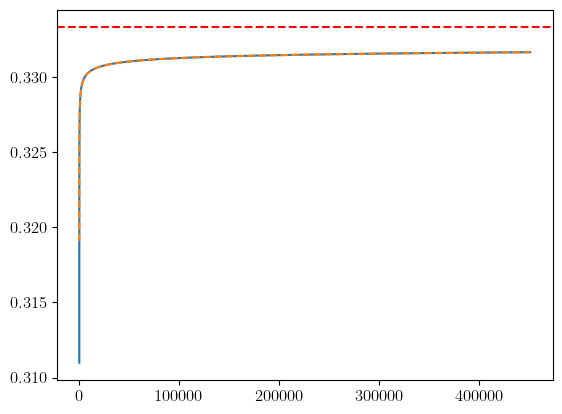

In [6]:
fig, ax = plt.subplots()
ax.plot(n, cs2)
ax.plot(n, cs2_grad, ls='--')
ax.axhline(1/3, color='r', linestyle='--');

In [7]:
def a_func(X):
    d1 = 0.5034
    eta1 = 0.3553
    return d1*X**(-eta1)

def b_func(X):
    d2 = 1.452
    eta2 = 0.9101
    return d2*X**(-eta2)

def P_SB(mu):
    return (3/(4*np.pi**2))*(mu/3)**4

def P_QCD(mu, X):
    # I beleive mu has to be in units of GeV, and this pressure is in GeV^4
    c1 = 0.9008
    return P_SB(mu)*(c1 - (a_func(X)/(mu - b_func(X))))

In [8]:
# kg m**3 s**-2 = J m
hbar*c

3.1615267734966903e-26

In [9]:
# eV m
hbar*c/e

1.973269804593025e-07

In [10]:
# GeV fm
(hbar*c/e) / 10**9 * 1e15

0.1973269804593025

In [11]:
# To convert from GeV^4 to GeV/fm^3 I multiply by
conversion = 1/(((hbar*c/e) / 10**9 * 1e15)**3)
conversion

130.1489261716633

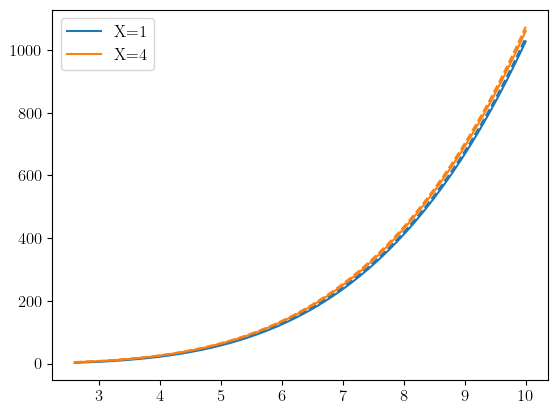

In [12]:
X_vals = [1, 4]
mu_vals = np.linspace(2.6, 10, num=50)

fig, ax = plt.subplots()
for i, X in enumerate(X_vals):
    pQCDX = pqcd.pQCD(X)
    p_fraga = []
    p_komoltsev = []
    for mu in mu_vals:
        p_fraga.append(P_QCD(mu, X)*conversion)
        p_komoltsev.append(pQCDX.pH(mu))
    c = f'C{i}'
    ax.plot(mu_vals, p_fraga, c=c, label=f'X={X}')
    ax.plot(mu_vals, p_komoltsev, c=c, ls='--')

ax.legend();

/Users/eliot/Documents/Research/EOS/pqcd/pqcd/pqcd.py:77: RuntimeWarning: invalid value encountered in log
  numerator = 4*np.pi*(1. - (64.*np.log(np.log(0.777632*mu**2*X**2))) /


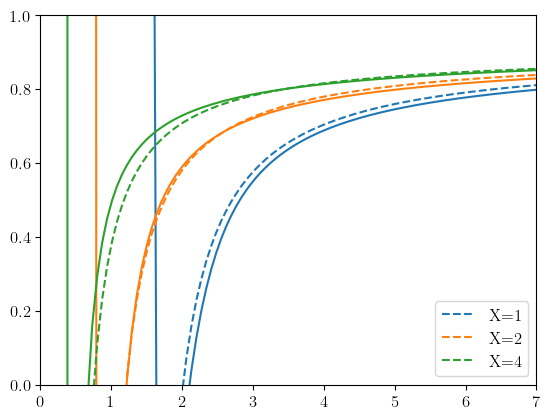

In [13]:
X_vals = [1, 2, 4]
mu_vals = np.linspace(0.1, 70, num=1000)

fig, ax = plt.subplots()
for i, X in enumerate(X_vals):
    pQCDX = pqcd.pQCD(X/2)
    p_fraga = []
    p_komoltsev = []
    for mu in mu_vals:
        p_fraga.append(P_QCD(mu, X)/P_SB(mu))
        p_komoltsev.append(pQCDX.pH(mu)/(conversion*P_SB(mu)))
    p_fraga = np.array(p_fraga)
    p_komoltsev = np.array(p_komoltsev)
    c = f'C{i}'
    ax.plot(mu_vals[np.argmin(p_fraga**2):], p_fraga[np.argmin(p_fraga**2):], c=c, ls='--', label=f'X={X}')
    ax.plot(mu_vals[np.argmin(p_komoltsev**2):], p_komoltsev[np.argmin(p_komoltsev**2):], c=c)

ax.set_xlim(0, 7)
ax.set_ylim(0, 1)
ax.legend();

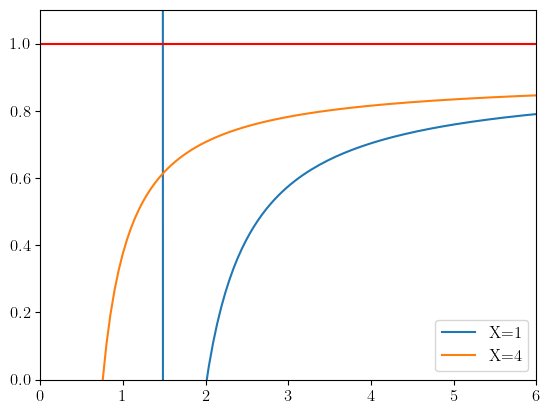

In [14]:
X_vals = [1, 4]
mu_vals = np.linspace(0.5, 50, num=1000)

fig, ax = plt.subplots()
for i, X in enumerate(X_vals):
    p_fraga = []
    for mu in mu_vals:
        p_fraga.append(P_QCD(mu, X)/P_SB(mu))
    c = f'C{i}'
    ax.plot(mu_vals, p_fraga, c=c, label=f'X={X}')

ax.axhline(1, c='red')

ax.set_xlim(0, 6)
ax.set_ylim(0, 1.1)
ax.legend();

In [15]:
soft_eos = pd.read_csv('../data/soft_eos.csv')

soft_number_density = soft_eos['n/n0'].values
chiEFT_mask = soft_number_density <= 1.1

soft_number_density = soft_number_density[chiEFT_mask]*nsat
soft_pressure = soft_eos['p'].values[chiEFT_mask]/1000
soft_energy_density = soft_eos['epsilon'].values[chiEFT_mask]/1000

soft_chemical_potential = (
    soft_energy_density+soft_pressure
    )/soft_number_density

soft_speed_of_sound_squared = np.gradient(
    soft_pressure, soft_energy_density
)

In [16]:
stiff_eos = pd.read_csv('../data/stiff_eos.csv')

stiff_number_density = stiff_eos['n/n0'].values
chiEFT_mask = stiff_number_density <= 1.1

stiff_number_density = stiff_number_density[chiEFT_mask]*nsat
stiff_pressure = stiff_eos['p'].values[chiEFT_mask]/1000
stiff_energy_density = stiff_eos['epsilon'].values[chiEFT_mask]/1000

stiff_chemical_potential = (
    stiff_energy_density+stiff_pressure
    )/stiff_number_density

stiff_speed_of_sound_squared = np.gradient(
    stiff_pressure, stiff_energy_density
)

In [17]:
mean_pressure = np.mean([soft_pressure, stiff_pressure], axis=0)

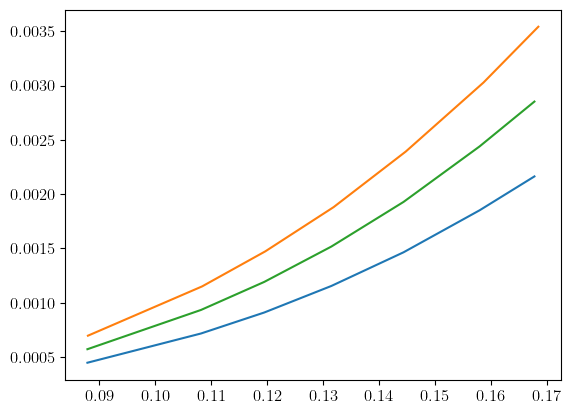

In [18]:
fig, ax = plt.subplots()

ax.plot(soft_energy_density, soft_pressure)
ax.plot(stiff_energy_density, stiff_pressure)
ax.plot(soft_energy_density, mean_pressure)

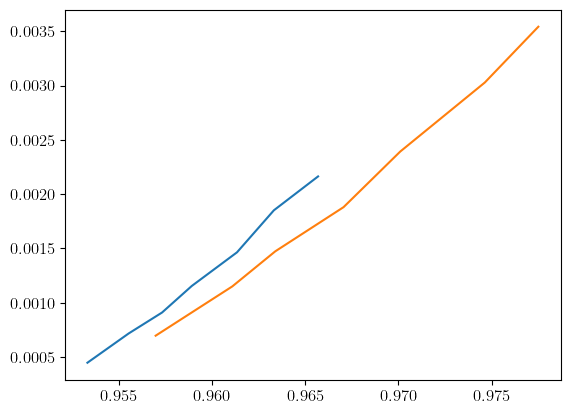

In [19]:
fig, ax = plt.subplots()

ax.plot(soft_chemical_potential, soft_pressure)
ax.plot(stiff_chemical_potential, stiff_pressure);

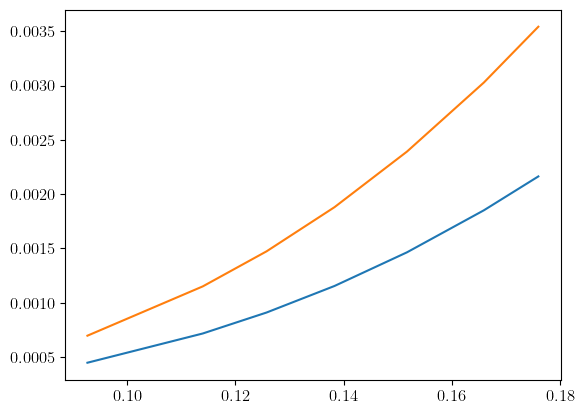

In [20]:
fig, ax = plt.subplots()

ax.plot(soft_number_density, soft_pressure)
ax.plot(stiff_number_density, stiff_pressure);

In [21]:
# Relative uncertainty at 1.1nsat = 0.176/fm^3
target_uncertainty = np.abs(stiff_pressure[-1] - soft_pressure[-1])/mean_pressure[-1]
target_uncertainty

0.4834355828220859

In [22]:
mu_vals = np.linspace(2.2, 4.2, num=100)

uncertainties = []
for mu in mu_vals:

    # X = 1/2
    pQCDX = pqcd.pQCD(1/2)
    p1 = pQCDX.pH(mu)

    # X = 1
    pQCDX = pqcd.pQCD(1)
    p2 = pQCDX.pH(mu)

    # X = 2
    pQCDX = pqcd.pQCD(2)
    p3 = pQCDX.pH(mu)

    uncertainties.append(np.abs(p1 - p3)/p2)

In [23]:
# Functions in the pQCD code assume X is fixed as a function of mu
X_list = np.linspace(0.5, 2, num=31)
X_list_highlight = [0.5, 1.0, 2.0]

p_dict = {X: [] for X in X_list}
n_dict = {X: [] for X in X_list}
cs2_dict = {X: [] for X in X_list}
epsilon_dict = {X: [] for X in X_list}

for X in X_list:
    pQCDX = pqcd.pQCD(X)
    for mu in mu_vals:
        p_dict[X].append(pQCDX.pH(mu))
        n_dict[X].append(pQCDX.nH(mu))
        cs2_dict[X].append(pQCDX.cs2H(mu))
        epsilon_dict[X].append(pQCDX.epsilonH(mu))

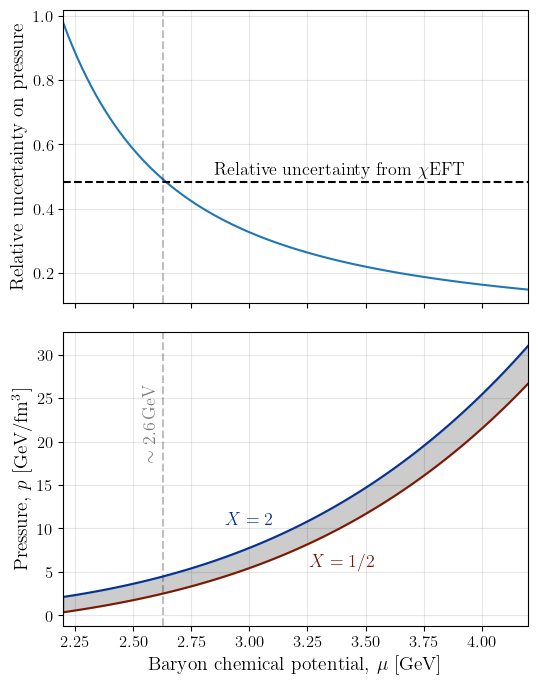

In [24]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
fig.subplots_adjust(hspace=0.1)
for ax in axs:
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

axs[0].plot(mu_vals, uncertainties)
axs[0].axhline(target_uncertainty, c='k', ls='--')

for ax in axs:
    ax.axvline(2.63, c='k', ls='--', alpha=0.25)

axs[1].text(
    2.61,
    22,
    '$\sim 2.6\,\mathrm{GeV}$',
    fontsize=13,
    alpha=0.5,
    ha='right',
    va='center',
    rotation=90
)

axs[0].text(
    2.85,
    target_uncertainty+0.01,
    'Relative uncertainty from $\chi$EFT',
    fontsize=13, 
    ha='left',
    va='bottom',
)

axs[1].fill_between(
    mu_vals,
    p_dict[0.5],
    p_dict[2],
    color='k',
    alpha=0.2
)

colors = [cm.roma(0.), cm.roma(1.)]
for i, X in enumerate([0.5, 2]):
    axs[1].plot(mu_vals, p_dict[X], c=colors[i])

axs[1].text(
    3.4,
    5, 
    '$X = 1/2$', 
    fontsize=13, 
    ha='center',
    va='bottom',
    c=cm.roma(0.)
)

axs[1].text(
    3, 
    10, 
    '$X = 2$', 
    fontsize=13, 
    ha='center',
    va='bottom',
    c=cm.roma(1.)
)

axs[0].set_xlim(mu_vals[0], mu_vals[-1])

axs[1].set_xlabel('Baryon chemical potential, $\mu$ [GeV]')
axs[0].set_ylabel('Relative uncertainty on pressure')
axs[1].set_ylabel('Pressure, $p$ [GeV/fm$^3$]')

fig.savefig('figures/paper/pqcd_uncertainty.pdf', bbox_inches='tight')

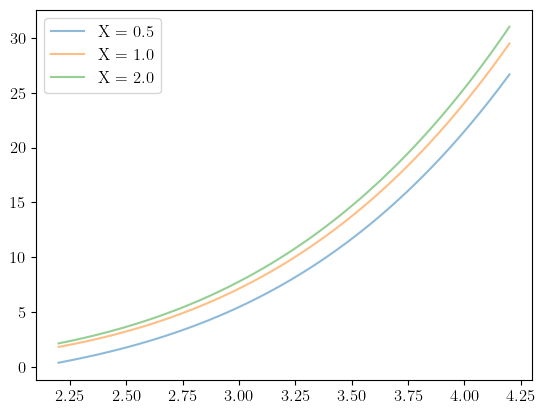

In [25]:
fig, ax = plt.subplots()

for i, X in enumerate(X_list_highlight):
    c = f'C{i}'
    ax.plot(mu_vals, p_dict[X], c=c, label=f'X = {X}', alpha=0.5)

ax.legend();

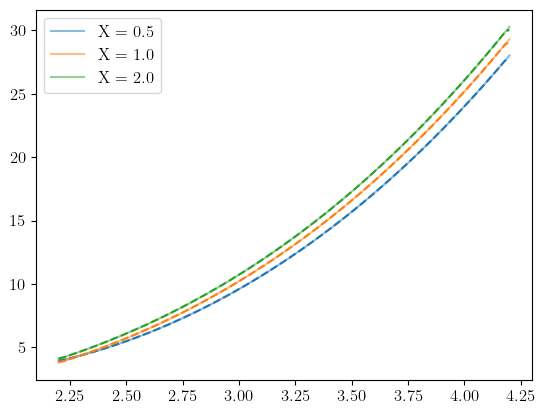

In [26]:
fig, ax = plt.subplots()

for i, X in enumerate(X_list_highlight):
    c = f'C{i}'
    ax.plot(mu_vals, n_dict[X], c=c, label=f'X = {X}', alpha=0.5)
    n_derived = np.gradient(p_dict[X], mu_vals)
    ax.plot(mu_vals, n_derived, c=c, ls='--')

ax.legend();

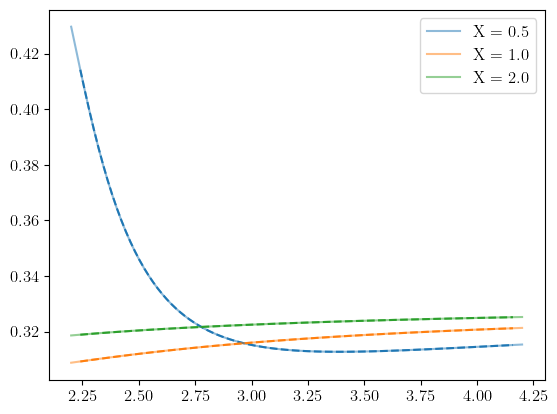

In [27]:
fig, ax = plt.subplots()

for i, X in enumerate(X_list_highlight):
    c = f'C{i}'
    ax.plot(mu_vals, cs2_dict[X], c=c, label=f'X = {X}', alpha=0.5)
    n_derived = np.gradient(p_dict[X], mu_vals)
    epsilon_derived = -np.array(p_dict[X]) + mu_vals*n_derived
    cs2_derived = np.gradient(p_dict[X], epsilon_derived)
    ax.plot(mu_vals[2:-2], cs2_derived[2:-2], c=c, ls='--')

ax.legend();

In [28]:
# What if we fix Lambda and then take the derivative wrt mu? We should do
# this analytically...

In [29]:
# But presumably the true EOS might not have a fixed X across different values 
# of mu?

X_vals = np.linspace(0.7, 1, num=1000)

p_Xvary = []
n_Xvary = []
cs2_Xvary = []
epsilon_Xvary = []

for mu, X in zip(mu_vals, X_vals):
    pQCDX = pqcd.pQCD(X)
    p_Xvary.append(pQCDX.pH(mu))
    n_Xvary.append(pQCDX.nH(mu))
    cs2_Xvary.append(pQCDX.cs2H(mu))
    epsilon_Xvary.append(pQCDX.epsilonH(mu))

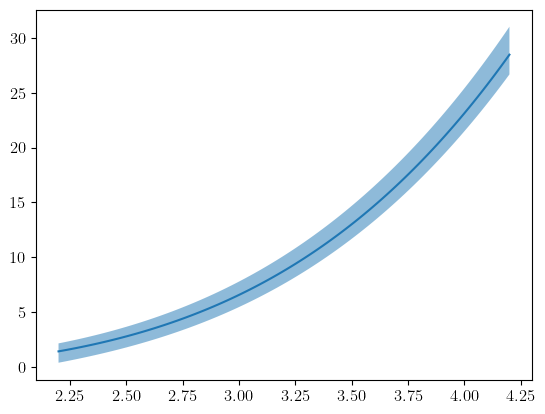

In [30]:
fig, ax = plt.subplots()
ax.fill_between(mu_vals, p_dict[0.5], p_dict[2], alpha=0.5)
ax.plot(mu_vals, p_Xvary);

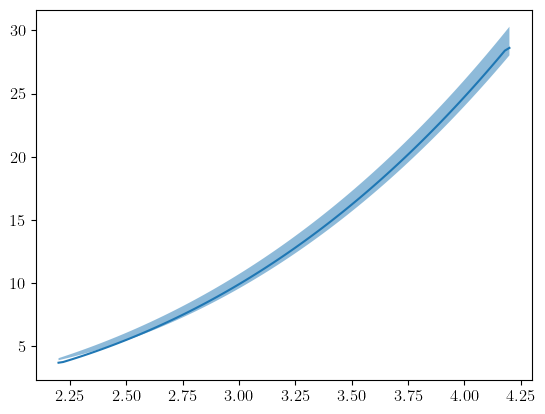

In [31]:
fig, ax = plt.subplots()
ax.fill_between(mu_vals, n_dict[0.5], n_dict[2], alpha=0.5)
ax.plot(mu_vals, np.gradient(p_Xvary, mu_vals));

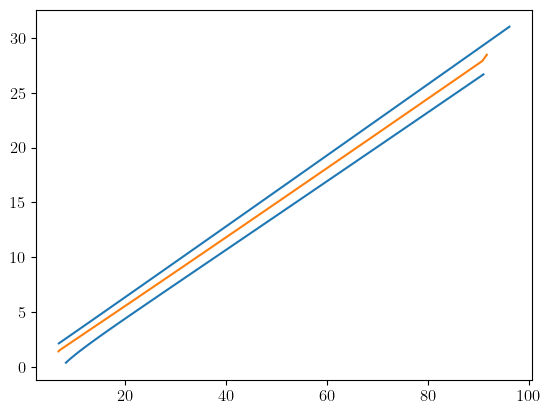

In [32]:
fig, ax = plt.subplots()
ax.plot(epsilon_dict[0.5], p_dict[0.5], c='C0')
ax.plot(epsilon_dict[2], p_dict[2], c='C0')
n = np.gradient(p_Xvary, mu_vals)
epsilon = -np.array(p_Xvary) + mu_vals*n
ax.plot(
    epsilon,
    p_Xvary, 
    c='C1'
);

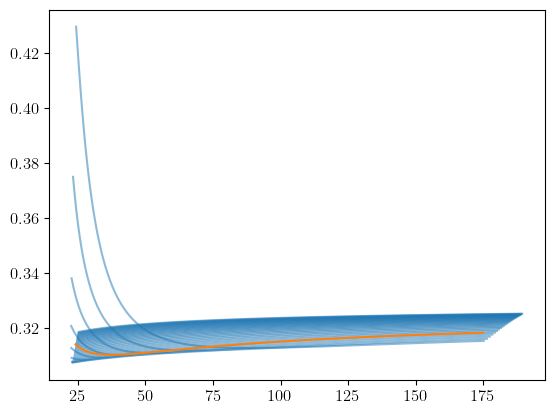

In [33]:
fig, ax = plt.subplots()
for i, X in enumerate(X_list):
    ax.plot(np.array(n_dict[X])/nsat, cs2_dict[X], c='C0', alpha=0.5)
ax.plot(n[2:-2]/nsat, np.gradient(p_Xvary, epsilon)[2:-2], c='C1');